In [1]:
import os
home = os.path.expanduser("~")
os.chdir(f'{home}/car_t_sc')
os.getcwd()

'/home/s377963/car_t_sc'

In [2]:
cd = os.getcwd()
functions_path = os.path.join(cd, '02_code/functions')

In [3]:
import scanpy as sc
import scanpy.external as sce
import numpy as np
import pandas as pd
import anndata as ad
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
from anndata import AnnData
import skmisc
import regex as re
import scipy.stats as stats
from itertools import combinations
import celltypist
from celltypist import models

import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

# from scipy.sparse import csr_matrix
import sys
sys.path.append(functions_path)
import functions_dat_processing as dp
import functions_plotting as dplt
import functions_for_CAR_annotation as ca
import functions_OVA_annotation as oa

cffi mode is CFFI_MODE.ANY
R home found: /home/s377963/mambaforge/envs/scanpy/lib/R
R library path: 
LD_LIBRARY_PATH: 
Default options to initialize R: rpy2, --quiet, --no-save
R is already initialized. No need to initialize.
/tmp/ipykernel_1454210/2844349157.py:23: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [ ]:
#install required bioconductor and github packages
remotes = ro.packages.importr('remotes')
bioc = ro.packages.importr('BiocManager') 

remotes.install_github("wuaipinglab/scImmuCC") #for integration based on MNNs
bioc.install('biomaRt')



* installing *source* package ‘hms’ ...
** Paket ‘hms’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (hms)
* installing *source* package ‘prettyunits’ ...
** Paket ‘prettyunits’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (prettyunits

rm -f filelock.so init.o filelock-unix.o locklist.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c init.c -o init.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377

installing to /home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-filelock/00new/filelock/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (filelock)
* installing *source* package ‘xml2’ ...
** Paket ‘xml2’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation


Found pkg-config cflags and libs!
Using PKG_CFLAGS=-I/home/s377963/mambaforge/envs/scanpy/include/libxml2 -I/home/s377963/mambaforge/envs/scanpy/include
Using PKG_LIBS=-L/home/s377963/mambaforge/envs/scanpy/lib -lxml2 -L/home/s377963/mambaforge/envs/scanpy/lib -lz -L/home/s377963/mambaforge/envs/scanpy/lib -llzma -L/home/s377963/mambaforge/envs/scanpy/lib -licui18n -licuuc -licudata -L/home/s377963/mambaforge/envs/scanpy/lib -lm -ldl


** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 14.1.0-0) 14.1.0’
using C++ compiler: ‘x86_64-conda-linux-gnu-c++ (conda-forge gcc 14.1.0-0) 14.1.0’


x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG -I../inst/include -I/home/s377963/mambaforge/envs/scanpy/include/libxml2 -I/home/s377963/mambaforge/envs/scanpy/include -DUCHAR_TYPE=wchar_t -DU_SHOW_CPLUSPLUS_API=0  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib   -fvisibility=hidden -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c connection.cpp -o connection.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/m

installing to /home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-xml2/00new/xml2/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (xml2)
* installing *source* package ‘progress’ ...
** Paket ‘progress’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing i

Update all/some/none? [a/s/n]: 

array(['biomaRt'], dtype='<U7')

In [17]:
#import required R packages
# soupx = ro.packages.importr('SoupX') 
# scran = ro.packages.importr('scran') 
# bcp = ro.packages.importr('BiocParallel') 
# scry = ro.packages.importr('scry')
# stacas = ro.packages.importr('STACAS')
seurat = ro.packages.importr('Seurat')
scImmuCC = ro.packages.importr('scImmuCC')
GSVA = ro.packages.importr('GSVA')
biomaRt = ro.packages.importr('biomaRt')
# Matrix = ro.packages.importr('Matrix')
# ProjecTILs = ro.packages.importr('ProjecTILs')


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [4]:
#if needed, reload functions
import importlib
importlib.reload(dp)
importlib.reload(dplt)
importlib.reload(ca)

<module 'functions_for_CAR_annotation' from '/home/s377963/car_t_sc/02_code/functions/functions_for_CAR_annotation.py'>

# 1. Trying Celltypist

In [5]:
#import data

# adata_raw = sc.read_h5ad('./01_data/processed/merged_and_processed/XXXCAR_genome/XXXCAR_genome_raw_demultiplexed.h5ad') 
adata_qc = sc.read_h5ad('./01_data/processed/merged_and_processed/XXXCAR_genome/XXXCAR_genome_after_qc.h5ad')
# adata_TIL_only = adata_qc[adata_qc.obs.Location != 'dLN']
adata_pureTC = sc.read_h5ad('./01_data/processed/merged_and_processed/XXXCAR_genome/XXXCAR_genome_after_qc_TIL_only_pure_TC_annotation.h5ad') 
# adata_only_pureTC = adata_pureTC[adata_pureTC.obs['is.pure_Tcell'] == 'Pure']
adata_pure_TC_annotated = sc.read_h5ad('./01_data/processed/merged_and_processed/XXXCAR_genome/XXXCAR_genome_after_qc_TIL_only_pure_TC_annotation_non_TC_filtered_TC_subtypes_annotated.h5ad') 
adata_only_annotatedTC = adata_pure_TC_annotated[~adata_pure_TC_annotated.obs['functional.cluster'].isna()]

In [6]:
non_annotated = [adata_qc, adata_pureTC, adata_only_annotatedTC]

In [7]:
for adata in non_annotated:
    adata.obs.rename(columns={"HTO_classification": "Classification"}, inplace=True) 
    adata.obs.rename(columns={"functional.cluster": "Tcell_subtype"}, inplace=True)
    adata.obs.rename(columns={"pool": "dataset"}, inplace=True)
    rmvd_p = [int(dataset.replace("P", "")) - 1 for dataset in adata.obs['dataset']]
    adata.obs['dataset'] = rmvd_p

In [66]:
#normalize as celltypist requires this
for adata in non_annotated:
    adata.layers['raw'] = adata.X
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

In [8]:
adata_pureTC

AnnData object with n_obs × n_vars = 16906 × 33696
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'Classification', 'hash.ID', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.5', 'seurat_clusters', 'dataset', 'condition', 'day', 'Location', 'Immune_UCell', 'Lymphoid_UCell', 'Tcell_UCell', 'Epithelial_UCell', 'Stromal_UCell', 'Myeloid_UCell', 'MoMacDC_UCell', 'Neutrophils_UCell', 'Talphabeta_UCell', 'Bcell_UCell', 'NK_UCell', 'Plasma_cell_UCell', 'CD4T_UCell', 'Treg_UCell', 'CD8T_UCell', 'Tgammadelta_UCell', 'Erythrocyte_UCell', 'Macrophage_UCell', 'pDC_UCell', 'cDC1_UCell', 'cDC2_UCell', 'DC3_UCell', 'MonoDC_UCell', 'PanBcell_UCell', 'APC_UCell', 'MoMac_UCell', 'is.pure_CD4T', 'is.pure_CD8T', 'is.pure_MoMacDC', 'is.pure_Myeloid', 'is.pure_panDC', 'is.pure_Tcell', 'is.pure_Tcell.alphabeta', 'scGate_multi', 'CellOntology_name', 'CellOntology_ID', 'nCount_RNA3', 'nFeature_RNA3'
    var: 'name'
    obsm: 'X_pca'

In [9]:
adata_pureTC.obsm['int_X_pca'] = adata_pureTC.obsm['X_pca']
del adata_pureTC.obsm['X_pca']
adata_pureTC.obsm['int_X_umap'] = adata_pureTC.obsm['X_umap']
del adata_pureTC.obsm['X_umap']
sc.pp.pca(adata_pureTC)
sc.pp.neighbors(adata_pureTC)
sc.tl.umap(adata_pureTC)
sc.tl.leiden(adata_pureTC, resolution=0.4, flavor="igraph", n_iterations=2)

# sc.pp.pca(adata_qc)
# sc.pp.neighbors(adata_qc)
# sc.tl.umap(adata_qc)
# sc.tl.leiden(adata_qc, resolution=0.4, flavor="igraph", n_iterations=2)

In [ ]:
#download celltypist models
models.download_models(force_update = True)
#select the immune model
model_low = models.Model.load(model = 'Immune_All_Low.pkl')
model_high = models.Model.load(model = 'Immune_All_High.pkl')

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54
📂 Storing models in /home/s377963/.celltypist/data/models
💾 Downloading model [1/54]: Immune_All_Low.pkl
💾 Downloading model [2/54]: Immune_All_High.pkl
💾 Downloading model [3/54]: Adult_COVID19_PBMC.pkl
💾 Downloading model [4/54]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [5/54]: Adult_Human_MTG.pkl
💾 Downloading model [6/54]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [7/54]: Adult_Human_PrefrontalCortex.pkl
💾 Downloading model [8/54]: Adult_Human_Skin.pkl
💾 Downloading model [9/54]: Adult_Human_Vascular.pkl
💾 Downloading model [10/54]: Adult_Mouse_Gut.pkl
💾 Downloading model [11/54]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [12/54]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [13/54]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [14/54]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [15/54]: COVID19_HumanChallenge_Blood

In [192]:
predictions_TC = celltypist.annotate(adata_pureTC, model = model_high, majority_voting = True, mode='prob match', p_thres=0.003)
# predictions_qc = celltypist.annotate(adata_qc, model = model_high, majority_voting = True)
# predictions = celltypist.annotate(adata_pureTC, model = model_low, majority_voting = True)

🔬 Input data has 16906 cells and 33696 genes
🔗 Matching reference genes in the model
🧬 6 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [194]:
celltypes_TC.obs.majority_voting

AAACCTGAGACAGGCT-1_1    B cells|T cells
AAACCTGCACAGGTTT-1_1    B cells|T cells
AAACCTGCATGAAGTA-1_1    B cells|T cells
AAACCTGGTAGGACAC-1_1    B cells|T cells
AAACCTGTCGCATGGC-1_1    B cells|T cells
                             ...       
TTTGGTTTCTCGATGA-1_9    B cells|T cells
TTTGTCACAGGCAGTA-1_9    B cells|T cells
TTTGTCAGTTCAGACT-1_9    B cells|T cells
TTTGTCATCCACGAAT-1_9    B cells|T cells
TTTGTCATCCGTAGTA-1_9    B cells|T cells
Name: majority_voting, Length: 16906, dtype: category
Categories (3, object): ['B cells|Double-positive thymocytes|Fibroblast..., 'B cells|Macrophages|T cells', 'B cells|T cells']

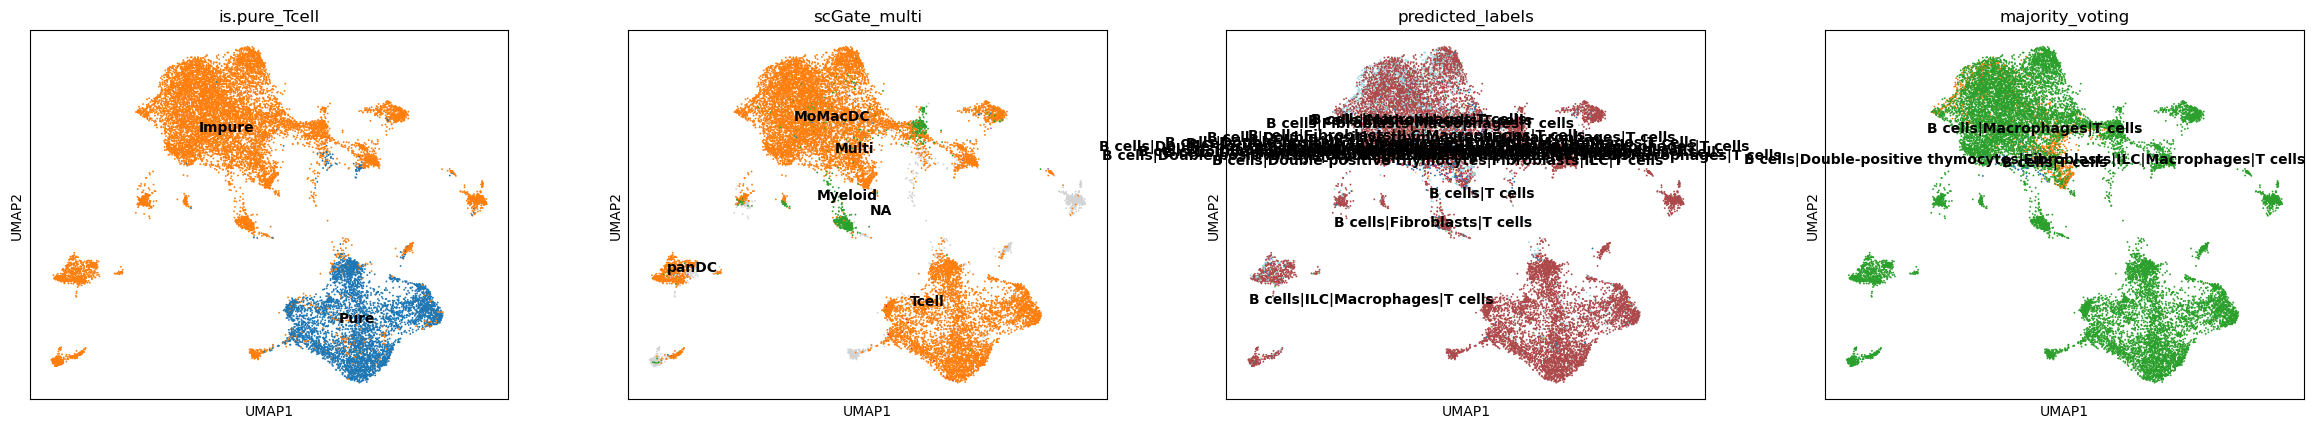

In [193]:
celltypes_TC = predictions_TC.to_adata()
# celltypes_qc = predictions_qc.to_adata()
sc.pl.umap(celltypes_TC, color = ['is.pure_Tcell', 'scGate_multi', 'predicted_labels', 'majority_voting'], legend_loc = 'on data')
# sc.pl.umap(celltypes_qc, color = ['predicted_labels', 'majority_voting'], legend_loc = 'on data')

# 2. Trying ImmunoCC

### import the merged data, low quality cells filtered out, TC annotated but all other cells also kept

In [24]:
%R file_path <- "~/car_t_sc/01_data/processed/merged_and_processed/XXXCAR_genome/XXXCAR_genome_after_qc_TIL_only_pure_TC_annotation.RData"
%R load(file_path)

%R print(stacas_scgate)
%R DefaultAssay(stacas_scgate) <- "RNA"
%R count_matrix_raw <- GetAssayData(stacas_scgate, slot = "counts")

An object of class Seurat 
34747 features across 16906 samples within 3 assays 
Active assay: integrated (1000 features, 1000 variable features)
 2 layers present: data, scale.data
 2 other assays present: RNA, HTO
 2 dimensional reductions calculated: pca, umap


'value'

### Convert the gene names == rownames from mouse to human, since this algorithm is using human gene orthologs

In [22]:
# %R musGenes <- c("Hmmr", "Tlx3", "Cpeb4")
%R musGenes <- rownames(count_matrix_raw)
%R count_matrix <- matrix(count_matrix_raw, nrow = nrow(count_matrix_raw), ncol = ncol(count_matrix_raw), dimnames = dimnames(count_matrix_raw))
# %R human = useMart("ensembl", dataset = "hsapiens_gene_ensembl" )
# %R mouse = useMart("ensembl", dataset = "mmusculus_gene_ensembl")

%R human <- useEnsembl("ensembl", dataset = "hsapiens_gene_ensembl" , version="105")
%R mouse <- useEnsembl("ensembl", dataset = "mmusculus_gene_ensembl", version="105")

%R genesV2 = getLDS(attributes = c("mgi_symbol"), filters = "mgi_symbol", values = musGenes , mart = mouse, attributesL = c("hgnc_symbol"), martL = human, uniqueRows=T)
# %R genesV2 = getLDS(attributes = c("ensembl_gene_id"), filters = "ensembl_gene_id", values = musGenes, mart = mouse, attributesL = c("ensembl_gene_id", "hgnc_symbol"), martL = human, uniqueRows=T)

# Convert mapping result into a named vector
%R mapping_dict <- setNames(genesV2[,2], genesV2[,1])

# Replace mapped genes and uppercase unmapped genes
%R new_rownames <- ifelse(musGenes %in% names(mapping_dict), mapping_dict[musGenes], toupper(musGenes))

# Ensure order is preserved
%R rownames(count_matrix) <- new_rownames


%R humanx <- unique(genesV2[, 2])
%R print(head(humanx))

[1] "MT-ND3" "MT-ND4" "MT-ND2" "MT-CO1" "MT-CYB" "MT-CO2"


'value'

In [19]:
%R count_matrix <- matrix(count_matrix_raw, nrow = nrow(count_matrix_raw), ncol = ncol(count_matrix_raw), dimnames = dimnames(count_matrix_raw))
%R count_matrix_dense <- as.matrix(count_matrix)

'value'

### remove douplicate gene names since when matchin mouse to human genes some mouse genes will map to the same human one

In [23]:
#convert sparse to dense matrix (ImmunoCC can only use dense type)
%R count_matrix_dense <- as.matrix(count_matrix)
%R str_vector <- rownames(count_matrix_dense)

# #extract those genes that are duplicates and subset the matrix accordingly
%R duplicates <- names(table(str_vector)[table(str_vector) > 1])
%R duplicates_mat <- count_matrix_dense[str_vector %in% duplicates,]

# #compute the colsumns accross doublet genes for each doublet gene 
%R doublet_matrix_dense_unq <- t(sapply(by(duplicates_mat,rownames(duplicates_mat),colSums),identity))

# Get the non-duplicated rows and subset the matrix accordingly
%R non_duplicates <- setdiff(str_vector, duplicates)
%R count_matrix_non_dup <- count_matrix_dense[str_vector %in% non_duplicates,]

# Concatenate the matrices using rbind
%R count_matrix_dense_unq <- rbind(doublet_matrix_dense_unq, count_matrix_non_dup)

# %R print(count_matrix_dense_unq[1:10, 1:10])
%R print(dim(count_matrix_dense_unq))
# %R print(head(duplicates))
# %R print(duplicates_mat[1:10,1:10])
# %R print(head(duplicates_names))

[1] 32196 16906


'value'

In [47]:
# %R print(head(colnames(count_matrix)))
# %R print(head(colnames(count_matrix_dense)))
%R print(head(colnames(count_matrix_dense_unq)))
%R print(sum(colnames(count_matrix_dense_unq) == colnames(count_matrix_raw)))
%R print(dim(count_matrix_dense_unq))

[1] "AAACCTGAGACAGGCT-1_1" "AAACCTGCACAGGTTT-1_1" "AAACCTGCATGAAGTA-1_1"
[4] "AAACCTGGTAGGACAC-1_1" "AAACCTGTCGCATGGC-1_1" "AAACGGGAGAAACCTA-1_1"
[1] 16906
[1] 32196 16906


'value'

### annotate celltypes using immucc, outputs are stored in pwd

In [ ]:
#change directory to where you wana save
# os.chdir('./01_data/processed/immuCC_out/second_run_allImmune_brcd_labels')
os.chdir(f'{home}/car_t_sc') 
os.chdir('./01_data/processed/immuCC_out/third_run_nonImmune_brcd_labels') 
os.getcwd()

'/home/s377963/car_t_sc/01_data/processed/immuCC_out/third_run_nonImmune_brcd_labels'

In [59]:
%R test <- scImmuCC_Layered(count_matrix_dense_unq,Non_Immune=TRUE) 

Estimating ssGSEA scores for 2 gene sets.
[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."
  |======================================================================| 100%

[1] "Normalizing..."
Estimating ssGSEA scores for 9 gene sets.
[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."
  |======================================================================| 100%

[1] "Normalizing..."
PC_ 1 
Positive:  CD74, FCER1G, TYROBP, H2-AA, CTSS, H2-EB1, APP, FTH1, TGFBI, LYZ2 
	   LGMN, HLA-DQB2, FCGR2A, C1QB, PSAP, C1QC, CD14, CXCL16, C1QA, CTSC 
Negative:  CD3G, CD3D, THY1, CD3E, NKG7, LCK, LTB, CD8B, PTPRCAP, IL2RB 
	   CD2, TNFRSF18, LAT, CTSW, CTLA2A, SH2D2A, CD8A, SKAP1, SEPTIN1, KLRD1 
PC_ 2 
Positive:  PKM, VIM, TPI1, ALDOA, TUBA1B, NME2, RPL14, BIRC5, RPLP0, RPS5 
	   PPIA, COX5A, TUBB, CYBA, CLIC1, PRDX5, MIF, LGALS1, STMN1, SELENOH 
Negative:  IKZF2, BTG1, MT-CO3, ETS1, TNFAIP3, RORA, MT-CO1, DENND4A, MALAT1, ZEB1 
	   P2RY10, SAMSN1,

'value'

### now import csvs generated and merge them with your anndata object

In [8]:
os.chdir(f'{home}/car_t_sc') 
path = './01_data/processed/immuCC_out/third_run_nonImmune_brcd_labels'
csv_files = sorted([f for f in os.listdir(path) if f.endswith(".csv")])
dfs = [pd.read_csv(os.path.join(path, file)) for file in csv_files[:7]]
dfs_reindx = [df.set_index('barcodes') for df in dfs]
dfs_reindx = [df.drop(columns="Unnamed: 0") for df in dfs_reindx]
merged_df = pd.concat(dfs_reindx, axis=1, join='outer') 
cols = ['isimmune', 'parent_immune_type', 'Bcell', 'DC', 'macrophage', 'monocyte', 'NK']
merged_df.columns = cols
merged_df

,isimmune,parent_immune_type,Bcell,DC,macrophage,monocyte,NK
barcodes,,,,,,,
AAACCTGAGACAGGCT-1_1,Immune,Tcell,NaN,NaN,NaN,NaN,NaN
AAACCTGCACAGGTTT-1_1,Non_Immune,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCATGAAGTA-1_1,Non_Immune,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGGTAGGACAC-1_1,Non_Immune,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGTCGCATGGC-1_1,Immune,Tcell,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
TTTGGTTTCTCGATGA-1_9,Immune,NK,NaN,NaN,NaN,NaN,NK_bright
TTTGTCACAGGCAGTA-1_9,Immune,NK,NaN,NaN,NaN,NaN,NK_bright
TTTGTCAGTTCAGACT-1_9,Immune,Macrophage,NaN,NaN,Macrophage_M1,NaN,NaN


In [9]:
#do some checking on how many tcells are equal from scgate and immucc
sum((adata_pureTC.obs['is.pure_Tcell'] == 'Pure') & (merged_df['parent_immune_type'] == 'Tcell'))
#check also if immucc correcty assigned only one celltype for each cell
sum((~merged_df.Bcell.isna()) & (~merged_df.DC.isna()) & (~merged_df.macrophage.isna()) & (~merged_df.monocyte.isna()) & (~merged_df.NK.isna()))

0

### include scgate classification for parent immune types

In [10]:
tcs_fix = adata_pureTC.obs['is.pure_Tcell'] == 'Pure'
#show what cells annotated by immuCC are TCs according to scgate
print(merged_df['parent_immune_type'][tcs_fix].value_counts())
#set all non Tcells from immuCC that are TCs according to scgate to Tcells
merged_df['parent_immune_type'][tcs_fix] = 'Tcell'
print(merged_df['parent_immune_type'][tcs_fix].value_counts())

parent_immune_type
NK            2517
Tcell          826
Macrophage      19
Mast             1
Name: count, dtype: int64
parent_immune_type
Tcell    4870
Name: count, dtype: int64


### merge immucc subcelltypes and include scgate classification

In [11]:
merged_celltypes = merged_df[['Bcell', 'DC', 'macrophage', 'monocyte', 'NK']].bfill(axis=1).iloc[:, 0]
merged_celltypes[tcs_fix] = 'NaN' 
merged_celltypes.replace('NaN', np.nan, inplace=True)
#check if any scgate annotated TC is still assigned another celltype by immucc
print(sum((adata_pureTC.obs['is.pure_Tcell'] == 'Pure') & ~(merged_celltypes.isna())))

#if not add as column to dataframe
merged_df['cellsubtypesXtc'] = merged_celltypes
merged_df

0


,isimmune,parent_immune_type,Bcell,DC,macrophage,monocyte,NK,cellsubtypesXtc
barcodes,,,,,,,,
AAACCTGAGACAGGCT-1_1,Immune,Tcell,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCACAGGTTT-1_1,Non_Immune,Tcell,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCATGAAGTA-1_1,Non_Immune,Tcell,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGGTAGGACAC-1_1,Non_Immune,Tcell,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGTCGCATGGC-1_1,Immune,Tcell,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
TTTGGTTTCTCGATGA-1_9,Immune,NK,NaN,NaN,NaN,NaN,NK_bright,NK_bright
TTTGTCACAGGCAGTA-1_9,Immune,NK,NaN,NaN,NaN,NaN,NK_bright,NK_bright
TTTGTCAGTTCAGACT-1_9,Immune,Macrophage,NaN,NaN,Macrophage_M1,NaN,NaN,Macrophage_M1


### add also the tcell subtypes from single cell gate

In [12]:
merged_df = merged_df.join(adata_only_annotatedTC.obs["Tcell_subtype"], how="left")
fix_tc_subtype = ~merged_df['Tcell_subtype'].isna()
merged_df['cellsubtypesAll'] = merged_df['cellsubtypesXtc']
merged_df.loc[fix_tc_subtype, "cellsubtypesAll"] = merged_df.loc[fix_tc_subtype, "Tcell_subtype"]

### fillna, subset df to interesting cols and merge with adata object for plotting

In [13]:
to_concat = merged_df[['parent_immune_type', 'cellsubtypesXtc','cellsubtypesAll']].copy()
to_concat['parent_immune_type'] = to_concat['parent_immune_type'].fillna('Non_Immune')
to_concat
# to_concat.fillna("Non_Immune", inplace=True)

,parent_immune_type,cellsubtypesXtc,cellsubtypesAll
barcodes,,,
AAACCTGAGACAGGCT-1_1,Tcell,NaN,NaN
AAACCTGCACAGGTTT-1_1,Tcell,NaN,NaN
AAACCTGCATGAAGTA-1_1,Tcell,NaN,CD8.TPEX
AAACCTGGTAGGACAC-1_1,Tcell,NaN,CD8.TEX
AAACCTGTCGCATGGC-1_1,Tcell,NaN,NaN
...,...,...,...
TTTGGTTTCTCGATGA-1_9,NK,NK_bright,NK_bright
TTTGTCACAGGCAGTA-1_9,NK,NK_bright,NK_bright
TTTGTCAGTTCAGACT-1_9,Macrophage,Macrophage_M1,Macrophage_M1


In [14]:
adata_pureTC.obs = adata_pureTC.obs.join(to_concat) 
adata_pureTC

AnnData object with n_obs × n_vars = 16906 × 33696
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'Classification', 'hash.ID', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.5', 'seurat_clusters', 'dataset', 'condition', 'day', 'Location', 'Immune_UCell', 'Lymphoid_UCell', 'Tcell_UCell', 'Epithelial_UCell', 'Stromal_UCell', 'Myeloid_UCell', 'MoMacDC_UCell', 'Neutrophils_UCell', 'Talphabeta_UCell', 'Bcell_UCell', 'NK_UCell', 'Plasma_cell_UCell', 'CD4T_UCell', 'Treg_UCell', 'CD8T_UCell', 'Tgammadelta_UCell', 'Erythrocyte_UCell', 'Macrophage_UCell', 'pDC_UCell', 'cDC1_UCell', 'cDC2_UCell', 'DC3_UCell', 'MonoDC_UCell', 'PanBcell_UCell', 'APC_UCell', 'MoMac_UCell', 'is.pure_CD4T', 'is.pure_CD8T', 'is.pure_MoMacDC', 'is.pure_Myeloid', 'is.pure_panDC', 'is.pure_Tcell', 'is.pure_Tcell.alphabeta', 'scGate_multi', 'CellOntology_name', 'CellOntology_ID', 'nCount_RNA3', 'nFeature_RNA3', 'parent_immune_type', 'cellsubty

In [ ]:
adata_pureTC.write("./01_data/processed/merged_and_processed/ImmunoCC_annotated/all_celltypes_annotated.h5ad")

... storing 'parent_immune_type' as categorical
... storing 'cellsubtypesXtc' as categorical
... storing 'cellsubtypesAll' as categorical


# Plotting of annotated celltypes

In [ ]:
cluster_colors_nontc = {
    "NK_dim": "#1F77B4",            # Blue
    "Macrophage_M1": "#FF7F0E",     # Orange
    "Macrophage_M2": "#2CA02C",     # Green
    "Classical_Mono": "#D62728",    # Red
    "NK_bright": "#9467BD",         # Purple
    "cDC": "#8C564B",               # Brown
    "NonClassical_Mono": "#E377C2", # Pink
    "Naive_B": "#7F7F7F",           # Gray
    "pDC": "#BCBD22",               # Yellow-green
    "Memory_B": "#17BECF"           # Cyan
}

# cluster_colors = {
#     "CD4.CTL_Exh": "#E69F00",
#     "CD4.CTL_GNLY": "#56B4E9",
#     "CD4.NaiveLike": "#009E73",
#     "CD4.Tfh": "#F0E442",
#     "CD4.Th17": "#0072B2",
#     "CD4.Treg": "#D55E00",
#     "CD4.CTL_EOMES": "#CC79A7",
#     "CD8.CM": "#800000",
#     "CD8.EM": "#9ACD32",
#     "CD8.MAIT": "#2F4F4F",
#     "CD8.NaiveLike": "#FF4500",
#     "CD8.TEMRA": "#FF6347",
#     "CD8.TEX": "#9400D3",
#     "CD8.TPEX": "#7FFFD4"
# }


cluster_colors = {
    # CD4 clusters - rich & distinct
    "CD4.CTL_Exh": "#D9771B",   # Deep orange
    "CD4.CTL_GNLY": "#1D80D1",  # Vivid blue
    "CD4.NaiveLike": "#008D62", # Strong teal-green
    "CD4.Tfh": "#EAC435",       # Warm golden yellow
    "CD4.Th17": "#3054A5",      # Deep indigo blue
    "CD4.Treg": "#C62F2F",      # Bold red
    "CD4.CTL_EOMES": "#B83280", # Strong magenta
    "CD8.CM": "#7D1C1C",        # Deep red-maroon
    "CD8.EM": "#60A917",        # Vivid green
    "CD8.MAIT": "#234F58",      # Dark cyan
    "CD8.NaiveLike": "#E44811", # Bright reddish-orange
    "CD8.TEMRA": "#D63E6C",     # Bold raspberry
    "CD8.TEX": "#7212A1",       # Intense purple
    "CD8.TPEX": "#0FB5AE"       # Vibrant turquoise
}

cluster_colors_parent = {
    "Tcell": "#1F77B4",        # Blue
    "NK": "#FF7F0E",           # Orange
    "Non_Immune": "#2CA02C",   # Green
    "Macrophage": "#D62728",   # Red
    "Monocyte": "#9467BD",     # Purple
    "Neutrophil": "#8C564B",   # Brown
    "DC": "#E377C2",           # Pink
    "Bcell": "#7F7F7F",        # Gray
    "Mast": "#BCBD22"          # Yellow-green
}



### UMAPs

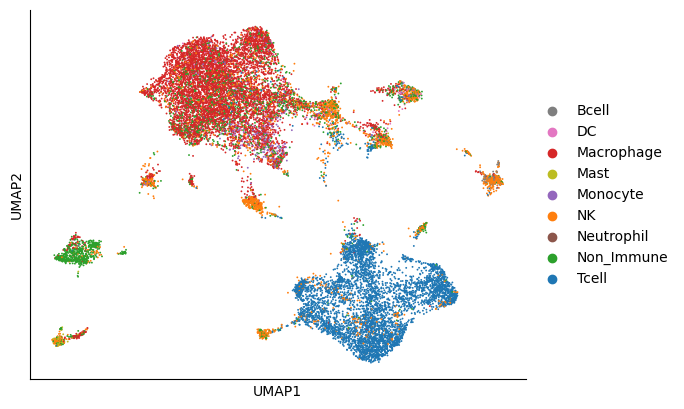

In [20]:
# adata_pureTC.obsm['X_pca'] = adata_pureTC.obsm['int_X_pca']
# adata_pureTC.obsm['X_umap'] = adata_pureTC.obsm['int_X_umap']
# sc.pl.umap(adata_pureTC, color = ['parent_immune_type', 'cellsubtypesXtc','cellsubtypesAll'])
sc.pl.umap(adata_pureTC, color = ['parent_immune_type'], palette=cluster_colors_parent, show=False)
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.set_title('')
path = './03_results/figures/Celltype/parent_UMAP.png'
plt.savefig(path, dpi=300, bbox_inches="tight") 

In [32]:
#if needed, reload functions
import importlib
importlib.reload(dp)
importlib.reload(dplt)
importlib.reload(ca)

<module 'functions_for_CAR_annotation' from '/home/s377963/car_t_sc/02_code/functions/functions_for_CAR_annotation.py'>

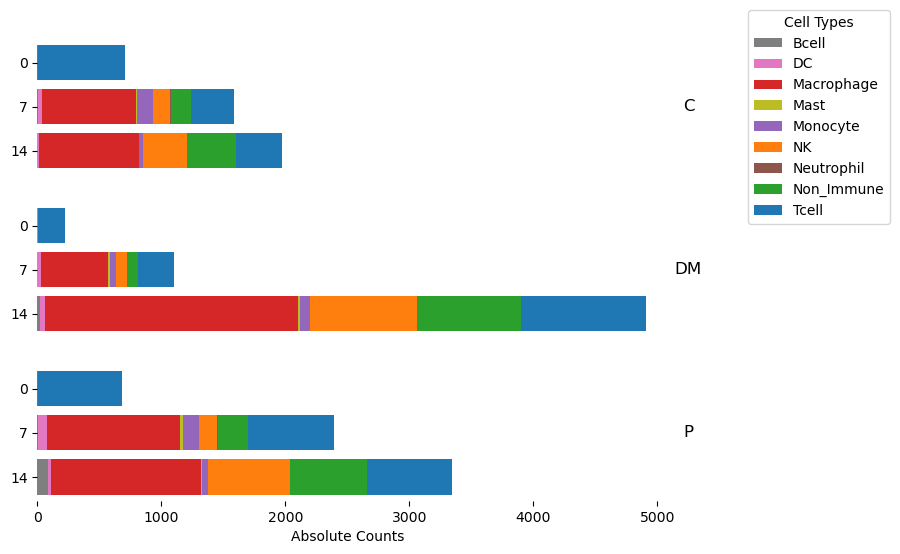

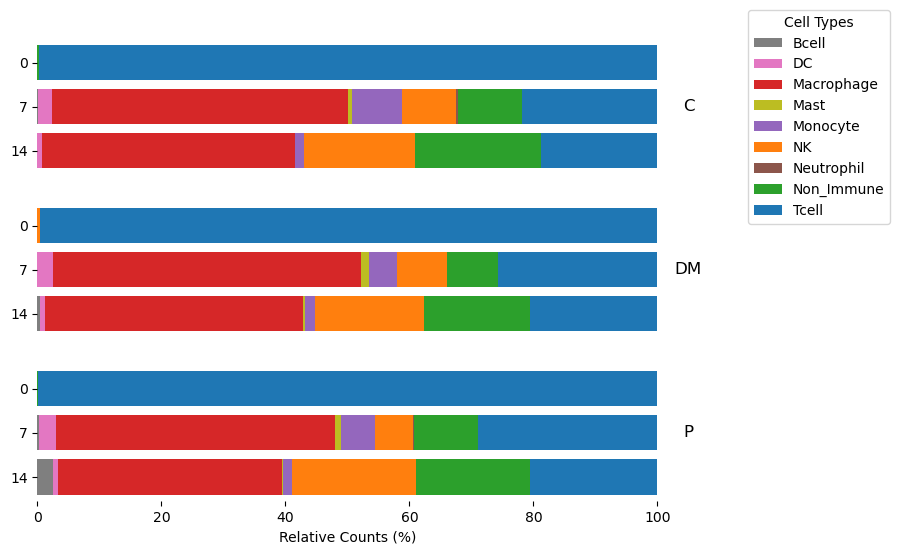

In [22]:
path = './03_results/figures/Celltype/parent_bar_abs.png'
dplt.stacked_barplot(adata_pureTC, 'parent_immune_type', 5000, xlabel='Absolute Counts', colors=cluster_colors_parent, norm=False, save_dir=path)
path = './03_results/figures/Celltype/parent_bar_rel.png'
dplt.stacked_barplot(adata_pureTC, 'parent_immune_type', 100, xlabel='Relative Counts (%)', colors=cluster_colors_parent, save_dir=path)

### import the stacas integration layer to generate a new umap based on it when subsetting the data for the non tc immunetypes

#### import and convert int layer to python

In [25]:
#import int layer
%R DefaultAssay(stacas_scgate) <- "integrated"
%R print(stacas_scgate)
%R data_matrix_int <- t(GetAssayData(stacas_scgate, slot = "data"))
%R scale_matrix_int <- t(GetAssayData(stacas_scgate, slot = "scale.data")) 
#convert to python
%R -o data_matrix_int
%R -o scale_matrix_int
#add cell and gene names
%R cells <- rownames(data_matrix_int)
%R genes <- colnames(data_matrix_int)
%R -o cells -o genes
#generate anndata object from it
adata_int_dat = ad.AnnData(data_matrix_int)
adata_int_dat.obs_names = cells
adata_int_dat.var_names = genes
#subset according to required immunetypes
adata_int_dat.obs['cellsubtypesXtc'] = adata_pureTC.obs.cellsubtypesXtc
adata_int_dat_only_nonTC = adata_pureTC[~adata_pureTC.obs.cellsubtypesXtc.isna()]

An object of class Seurat 
34747 features across 16906 samples within 3 assays 
Active assay: integrated (1000 features, 1000 variable features)


 2 layers present: data, scale.data
 2 other assays present: RNA, HTO
 2 dimensional reductions calculated: pca, umap


### plot umap and barplot for non tc subtypes

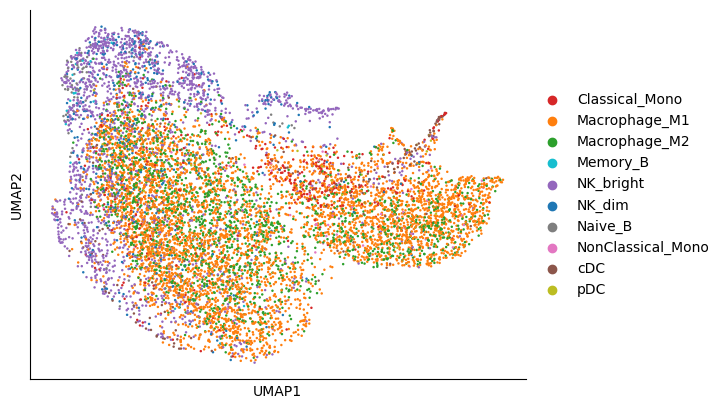

In [27]:
sc.pp.pca(adata_int_dat_only_nonTC)
sc.pp.neighbors(adata_int_dat_only_nonTC)
sc.tl.umap(adata_int_dat_only_nonTC)
sc.pl.umap(adata_int_dat_only_nonTC, color = ['cellsubtypesXtc'], palette=cluster_colors_nontc, show=False)
# Remove the surrounding box and leave only the x and y axes
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.set_title('')


# Now display the plot
path = './03_results/figures/Celltype/nontc_UMAP.png'
plt.savefig(path, dpi=300, bbox_inches="tight") 
plt.show()

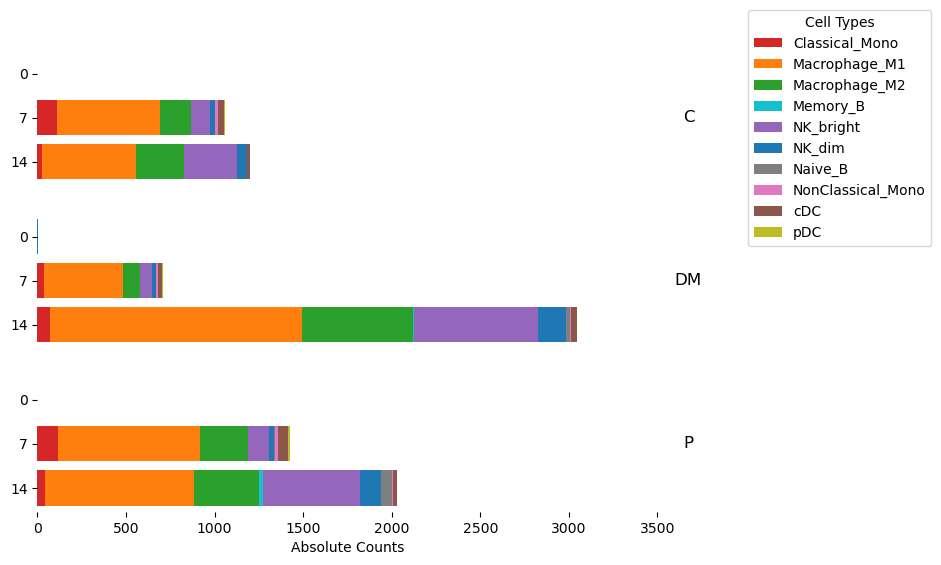

In [ ]:
path = './03_results/figures/Celltype/nontc_bar_abs.png'
dplt.stacked_barplot(adata_int_dat_only_nonTC, 'cellsubtypesXtc', 3500, xlabel='Absolute Counts', colors=cluster_colors_nontc, norm=False, save_dir = path)
path = './03_results/figures/Celltype/nontc_bar_rel.png' 
dplt.stacked_barplot(adata_int_dat_only_nonTC, 'cellsubtypesXtc', 100, xlabel='Relative Counts (%)', colors=cluster_colors_nontc, save_dir = path)

### plot also umap and barplot for tc subtypes

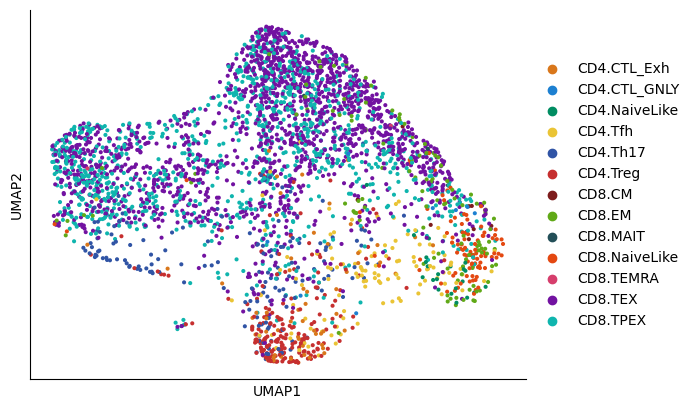

In [45]:
sc.pl.umap(adata_only_annotatedTC, color = ['Tcell_subtype'], palette=cluster_colors, show=False)
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.set_title('')
path = './03_results/figures/Celltype/tc_UMAP.png'
plt.savefig(path, dpi=300, bbox_inches="tight") 

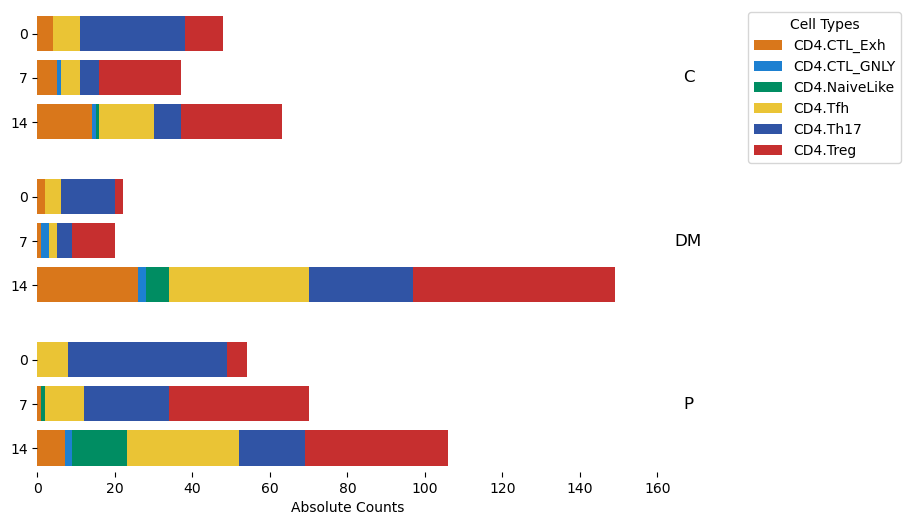

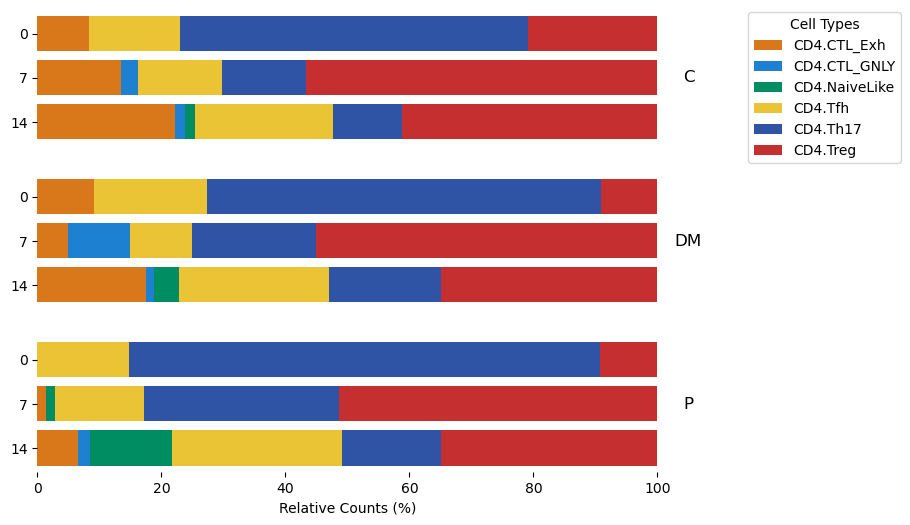

In [46]:
path = './03_results/figures/Celltype/cd4_bar_abs.png'
dplt.stacked_barplot(adata_only_annotatedTC, 'Tcell_subtype', 160, xlabel='Absolute Counts', colors=cluster_colors, common_cell_subtype='CD4', norm=False, save_dir=path)
path = './03_results/figures/Celltype/cd4_bar_rel.png'
dplt.stacked_barplot(adata_only_annotatedTC, 'Tcell_subtype', 100, xlabel='Relative Counts (%)', colors=cluster_colors, common_cell_subtype='CD4', save_dir=path)

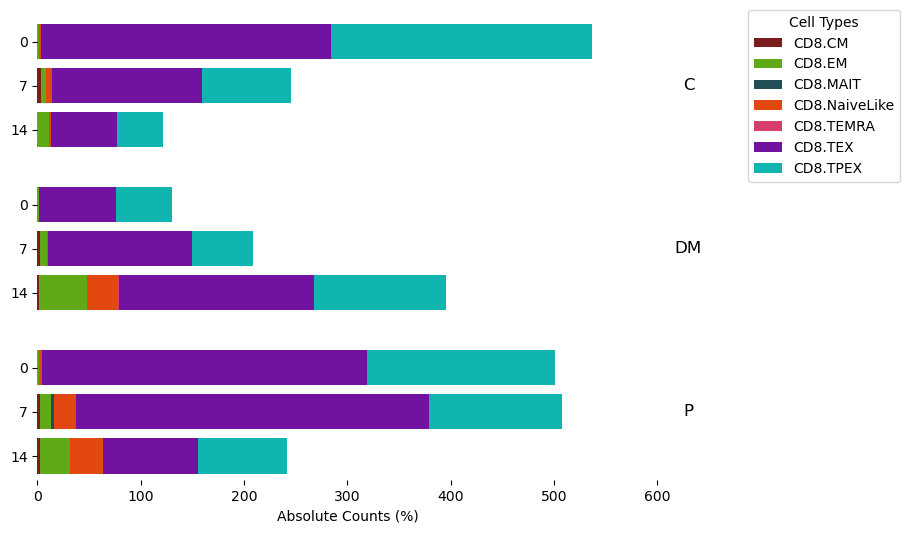

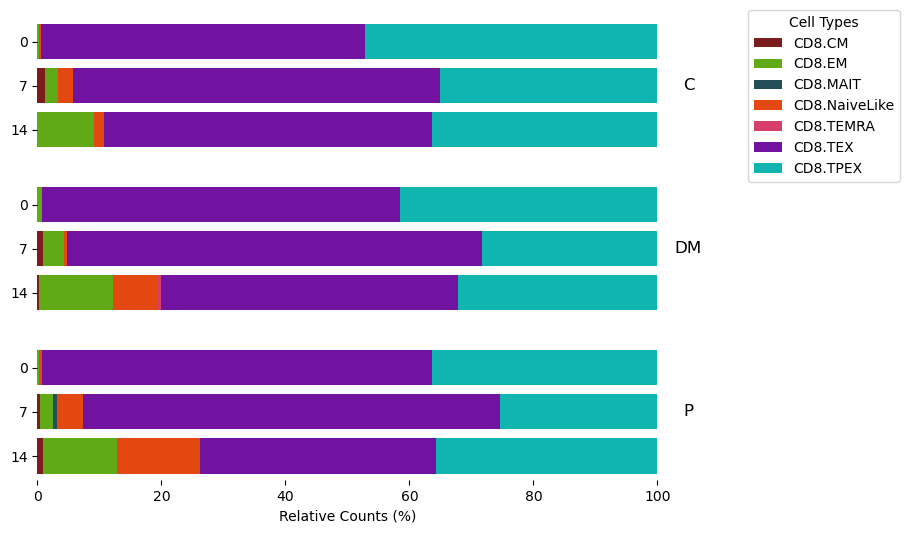

In [47]:
path = './03_results/figures/Celltype/cd8_bar_abs.png'
dplt.stacked_barplot(adata_only_annotatedTC, 'Tcell_subtype', 600, xlabel='Absolute Counts (%)', common_cell_subtype='CD8', colors=cluster_colors, norm=False, save_dir=path)
path = './03_results/figures/Celltype/cd8_bar_rel.png'
dplt.stacked_barplot(adata_only_annotatedTC, 'Tcell_subtype', 100, xlabel='Relative Counts (%)', common_cell_subtype='CD8', colors=cluster_colors, save_dir=path)